### *Iris setosa*

<img src="images/iris_setosa.jpg" />

### *Iris versicolor*
<img src="images/iris_versicolor.jpg" />

### *Iris virginica*
<img src="images/iris_virginica.jpg" />

## Step 1: Answering the question


>Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?

>Did you define the metric for success before beginning?

>Did you understand the context for the question and the scientific or business application?

>Did you record the experimental design?

>Did you consider whether the question could be answered with the available data?



Notice that we've spent a fair amount of time working on the problem without writing a line of code or even looking at the data. Thinking about and documenting the problem we're working on is an important step to performing effective data analysis that often goes overlooked. Don't skip it.

**Also, you will be asked to answer this questions for your project so keep them in mind.**

In [2]:
import pandas as pd
iris_data_clean = pd.read_csv("iris-data-clean.csv")
iris_data_clean.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<img src="images/petal_sepal.jpg" />


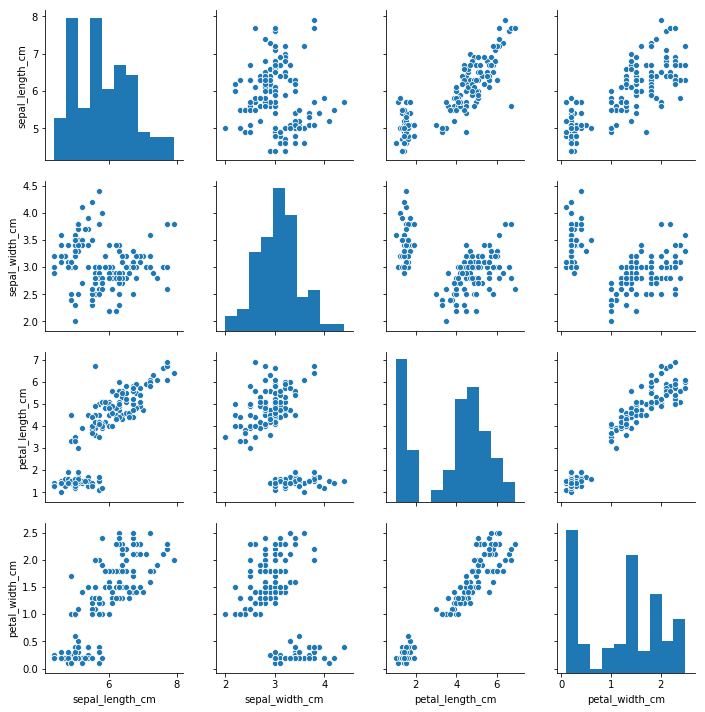

In [5]:
import seaborn as sns

sns.pairplot(iris_data_clean)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


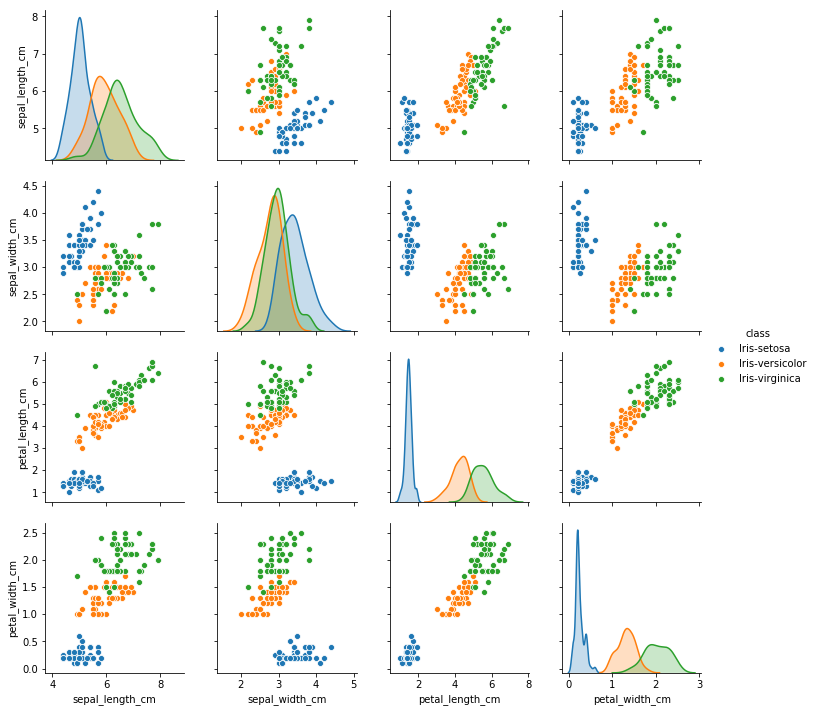

In [6]:
sns.pairplot(iris_data_clean, hue='class')

In [8]:
from sklearn.model_selection import train_test_split
y = iris_data_clean['class']
X = iris_data_clean.drop('class', axis=1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

In [35]:
iris_data_clean.shape

(149, 5)

In [36]:
X_train.shape

(111, 4)

In [37]:
from sklearn.tree import DecisionTreeClassifier 

decision_tree_classifier = DecisionTreeClassifier()


In [38]:
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
decision_tree_classifier.score(X_test, y_test)

0.9736842105263158

The steps are:
* Shuffle the dataset randomly.
* Split the dataset into k groups
* For each unique group:
    * Take the group as a hold out or test data set
    * Take the remaining groups as a training data set
    * Fit a model on the training set and evaluate it on the test set
    * Retain the evaluation score and discard the model
    * Summarize the skill of the model using the sample of model evaluation scores
    
    
![](k-fold.jpg)


In [41]:
from sklearn.model_selection import StratifiedKFold


In [42]:
cross_validation = StratifiedKFold(n_splits=10)


In [43]:
cross_validation

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

(array([3., 0., 0., 0., 0., 5., 0., 0., 0., 2.]),
 array([0.94736842, 0.95263158, 0.95789474, 0.96315789, 0.96842105,
        0.97368421, 0.97894737, 0.98421053, 0.98947368, 0.99473684,
        1.        ]),
 <a list of 10 Patch objects>)

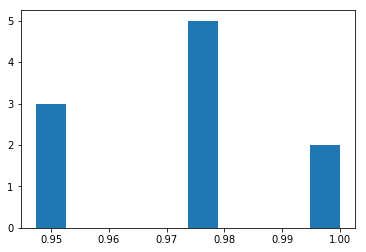

In [50]:
model_accuracies = []
import matplotlib.pyplot as plt
for repetition in range(10):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(X, y, test_size=0.25)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)


Text(0.5, 1.0, 'Average score: 0.9533333333333334')

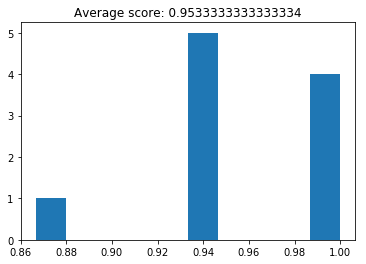

In [48]:
from sklearn.model_selection import cross_val_score
import numpy as np
decision_tree_classifier = DecisionTreeClassifier()
cv_scores = cross_val_score(decision_tree_classifier, X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))